# Library

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime

In [2]:
# 소수점 옵션
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('display.float_format')

# 수정사항
- 2023.03.21
    - item 2 : EG
        - 1. 개별 차량에 대한 지역코드를 부여하여, 지역마다 얼마나 차량들이 존재하는지 구분이 필요한 것 같음

    이 외에도 내일 오전에 동양에서 가시화와 관련된 회의에서 추가적으로 필요하다고 판단되는 사항에 대해 추가적으로 분석이 필요할 것 같음

- 2023.03.22
    - result파일에 'EG' 컬럼 추가

- 2023.03.24
    - result파일에 '배인번호_수정', '등급_수정', 'DPF유무_수정' 컬럼 추가

# fold path

In [3]:
drive = 'D'

In [4]:
raw_fold = f'{drive}:/data/big2/BD1/raw'
ods_fold = f'{drive}:/data/big2/ODS'
sample_fold = f'{drive}:/data/big2/BD1/sample'
analysis_fold = f'{drive}:/data/big2/BD1/an'

# Load

## result 최종(전체)(최근3년 정기&정밀 검사 포함)

In [17]:
# about 23.5s
name = '4등급_차량_리스트_양식_result_최종(전체)(정기&정밀)(2023.05.17_PM.05.40.37)'
file_name = f'{name}.csv'
result = pd.read_csv(os.path.join(raw_fold, file_name), low_memory=False)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502235 entries, 0 to 1502234
Data columns (total 60 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   차대번호        1502235 non-null  object 
 1   차량번호        1502235 non-null  object 
 2   제원관리번호      1502235 non-null  object 
 3   차종          1502235 non-null  object 
 4   용도          1502235 non-null  object 
 5   최초등록일       1502235 non-null  int64  
 6   연식          1502235 non-null  int64  
 7   제작일자        1335178 non-null  float64
 8   검사유효일       1502223 non-null  float64
 9   배출가스인증번호    1384783 non-null  object 
 10  등급          1502235 non-null  int64  
 11  차명          1502235 non-null  object 
 12  차종분류        1502235 non-null  object 
 13  차종유형        1502235 non-null  object 
 14  자동차형식       1501958 non-null  object 
 15  제작사명        1492590 non-null  object 
 16  연료          1502235 non-null  object 
 17  엔진형식        1500400 non-null  object 
 18  총중량         1502234 no

In [18]:
result.loc[result['배출가스인증번호'] == '9MY-AD-14-04', '제원관리번호'].value_counts()

02420011500011209    584
02420011500031210    208
02420011500001209    184
Name: 제원관리번호, dtype: int64

In [19]:
result.loc[result['배출가스인증번호'] == '9MY-AD-14-04', ['제원관리번호', '등급_수정']].head()

,제원관리번호,등급_수정
1002799,02420011500001209,4.00
1002800,02420011500011209,4.00
1002801,02420011500011209,4.00
1002802,02420011500011209,4.00
1002803,02420011500001209,4.00


# 전처리

## 컬럼명 수정

In [20]:
result.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀'],
      dtype='object')

## 9MY-AD-14-04 4등급 수정 확인

In [21]:
result.loc[result['배출가스인증번호'] == '9MY-AD-14-04', '등급_수정'].shape

(976,)

In [22]:
result.loc[result['배출가스인증번호'] == '9MY-AD-14-04', '등급_수정'].unique()

array([4.])

In [23]:
# result.loc[result['배출가스인증번호'] == '9MY-AD-14-04', '등급_수정'] = 4

## 유니목1200 5등급으로 수정 확인

In [25]:
result.loc[result['차대번호'] =='WDB1260251A480232', ['차명', '등급_수정']]

,차명,등급_수정
1150788,유니목1200,5.00


In [14]:
# result.loc[result['차대번호'] =='WDB1260251A480232', '등급_수정'] = 5

## 휘발유, LPG 차량 등급_수정 값 확인
- 4등급

In [26]:
result.loc[(result['연료'] == '휘발유') | (result['연료'] == 'LPG(액화석유가스)'), '등급_수정'].value_counts(dropna=False)

4.00    348419
Name: 등급_수정, dtype: int64

In [22]:
# result.loc[(result['연료'] == '휘발유') | (result['연료'] == 'LPG(액화석유가스)'), '등급_수정'] = 4

In [23]:
# result.loc[(result['연료'] == '휘발유') | (result['연료'] == 'LPG(액화석유가스)'), '등급_수정'].value_counts(dropna=False)

4.00    348419
Name: 등급_수정, dtype: int64

## 알코올, CNG, 기타연료 등급_수정 값 수정
- 4등급

In [27]:
result.loc[(result['연료'] == '알코올') | (result['연료'] == 'CNG(압축천연가스)') | (result['연료'] == '기타연료'), '등급_수정'].value_counts(dropna=False)

4.00    3
Name: 등급_수정, dtype: int64

In [28]:
# result.loc[(result['연료'] == '알코올') | (result['연료'] == 'CNG(압축천연가스)') | (result['연료'] == '기타연료'), '등급_수정'] = 4

In [29]:
# result.loc[(result['연료'] == '알코올') | (result['연료'] == 'CNG(압축천연가스)') | (result['연료'] == '기타연료'), '등급_수정'].value_counts(dropna=False)

4.00    3
Name: 등급_수정, dtype: int64

## 등급 수정
- 5등급으로 수정
    - 배인번호_수정 : 4MY-DB-04, 24개
    - 배인번호_수정 : 4MY-DB-03, 9개

In [ ]:
result['등급_수정'].value_counts(dropna=False)

In [ ]:
result.loc[result['배인번호_수정'] == '4MY-DB-04'].shape

(24, 36)

In [ ]:
result.loc[result['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

array([4.])

In [ ]:
# result.loc[result['배인번호_수정'] == '4MY-DB-04', '등급_수정'] = 5

In [ ]:
# result.loc[result['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

array([5.])

In [ ]:
result.loc[result['배인번호_수정'] == '4MY-DB-03'].shape

(9, 36)

In [ ]:
result.loc[result['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

array([4.])

In [ ]:
# result.loc[result['배인번호_수정'] == '4MY-DB-03', '등급_수정'] = 5

In [ ]:
# result.loc[result['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

array([5.])

In [ ]:
result['등급_수정'].value_counts(dropna=False)

등급_수정
4.00    1497678
3.00       4397
5.00        160
Name: count, dtype: int64

## 4등급 차량만

In [28]:
result['연료'].value_counts(dropna=False)

경유             1153813
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: 연료, dtype: int64

In [29]:
result['등급_수정'].value_counts(dropna=False)

4.00    1497711
3.00       4397
5.00        127
Name: 등급_수정, dtype: int64

In [30]:
result.loc[result['연료'] == '경유', '등급_수정'].value_counts(dropna=False)

4.00    1149289
3.00       4397
5.00        127
Name: 등급_수정, dtype: int64

In [31]:
result1 = result.loc[result['등급_수정'] == 4]
result1.shape

(1497711, 60)

In [32]:
g3_g5 = result.loc[result['등급_수정'] != 4]
g3_g5.shape

(4524, 60)

## 중복 차대번호 확인
- 최종등록일자, 배출가스검사유효일자 최신 데이터 사용

In [33]:
len(result1['차대번호'].unique())

1497690

## 연료 확인

In [34]:
result1['연료'].value_counts(dropna=False)

경유             1149289
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: 연료, dtype: int64

## 연료 컬럼 추가

In [35]:
# 1149289
rw1 = result1.loc[result1['연료'] == '경유'].reset_index(drop=True)
rw1.shape

(1149289, 60)

In [36]:
# 348419
rw2 = result1.loc[(result1['연료'] == '휘발유') | (result1['연료'] == 'LPG(액화석유가스)')].reset_index(drop=True)
rw2.shape

(348419, 60)

In [37]:
# 3
rw_rest = result1.loc[(result1['연료'] == '알코올') | (result1['연료'] == 'CNG(압축천연가스)') | (result1['연료'] == '기타연료')].reset_index(drop=True)
rw_rest.shape

(3, 60)

In [39]:
result1.shape[0]

1497711

In [38]:
rw1.shape[0] + rw2.shape[0] + rw_rest.shape[0]

1497711

In [40]:
rw1['fuel'] = '경유'
rw2['fuel'] = '휘발유_가스'

In [43]:
result1['연료'].value_counts(dropna=False)

경유             1149289
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: 연료, dtype: int64

In [41]:
rw1['fuel'].value_counts()

경유    1149289
Name: fuel, dtype: int64

In [42]:
rw2['fuel'].value_counts()

휘발유_가스    348419
Name: fuel, dtype: int64

## 경유, 휘발유_가스, 나머지 병합

In [44]:
rw1.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀', 'fuel'],
      dtype='object')

In [45]:
rw2.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀', 'fuel'],
      dtype='object')

In [48]:
rw_rest.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀'],
      dtype='object')

In [49]:
df = pd.concat([rw1, rw2, rw_rest], ignore_index=True)
df.shape

(1497711, 61)

In [51]:
df['fuel'].value_counts(dropna=False)

경유        1149289
휘발유_가스     348419
NaN             3
Name: fuel, dtype: int64

In [52]:
df['DPF유무_수정'].value_counts(dropna=False)

무       879365
NaN     348422
유       253675
확인불가     16249
Name: DPF유무_수정, dtype: int64

In [35]:
# df['DPF유무_수정'] = df['DPF유무_수정'].fillna('무')
# df.loc[df['DPF유무_수정'] == '확인불가', 'DPF유무_수정'] = '무'

In [53]:
df['DPF유무_수정'].value_counts(dropna=False)

무       879365
NaN     348422
유       253675
확인불가     16249
Name: DPF유무_수정, dtype: int64

# 분석

In [54]:
grade_list = []
for f, y, cy, e in tqdm(df[['fuel', '제작일자', '연식', 'DPF유무_수정']].values):
    if (f == '휘발유_가스') and ( (19980101 <= y <= 20001231) or (1998 <= cy <= 2000) ):
        grade_list.append('A')
    elif (f == '휘발유_가스') and ( (y <= 19971231) or (cy <= 1997) ):
        grade_list.append('B')
    elif (f == '경유') and ( (y >= 20080101) or (cy >= 2008) ) and (e == '유'):
        grade_list.append('A')
    elif (f == '경유') and ( (y <= 20071231) or (cy <= 2007) )and (e == '유'):
        grade_list.append('B')
    elif (f == '경유') and ( (y >= 20080101) or (cy >= 2008) ) and (e == '무'):
        grade_list.append('C')
    elif (f == '경유') and ( (y <= 20071231) or (cy <= 2007) ) and (e == '무'):
        grade_list.append('D')
    else:
        grade_list.append('X')
len(grade_list)

100%|██████████| 1497711/1497711 [00:02<00:00, 529708.57it/s]


1497711

In [55]:
grade_list[:5]

['D', 'D', 'D', 'D', 'D']

In [56]:
num = 85420
grade_list[num:num+10]

['C', 'C', 'D', 'C', 'C', 'D', 'D', 'C', 'C', 'D']

In [57]:
grade_list[-5:]

['B', 'B', 'X', 'X', 'X']

In [58]:
df['Grade'] = grade_list

In [59]:
num_by_fuel = df.groupby(['fuel'])['차대번호'].count().reset_index().sort_values('차대번호', ascending=False)
num_by_fuel = num_by_fuel.rename(columns={'차대번호':'대수'})
num_by_fuel

,fuel,대수
0,경유,1149289
1,휘발유_가스,348419


In [60]:
num_by_grade = df.groupby(['fuel', 'Grade'])['차대번호'].count().unstack()
# num_by_grade = num_by_grade.rename('대수')
num_by_grade

Grade,A,B,C,D,X
fuel,,,,,
경유,167293.00,86382.00,840425.00,38940.00,16249.00
휘발유_가스,40729.00,291937.00,NaN,NaN,15753.00


In [61]:
num_by_grade_by_local = df.groupby(['시도명', 'Grade'])['차대번호'].count().unstack()
# num_by_grade_by_local = num_by_grade_by_local.rename('대수')
num_by_grade_by_local

Grade,A,B,C,D,X
시도명,,,,,
강원도,7544,10774,34963,1677,967
경기도,52407,99870,189687,9822,7733
경상남도,16063,23214,71293,3025,2358
경상북도,14147,23492,73252,2901,2213
광주광역시,5733,10070,21859,1006,726
대구광역시,10086,18588,36183,1928,1731
대전광역시,5775,11717,21701,1095,988
부산광역시,11419,19515,41171,1776,1688
서울특별시,25534,62671,77485,4289,5350


In [62]:
num_by_grade_by_local.columns

Index(['A', 'B', 'C', 'D', 'X'], dtype='object', name='Grade')

In [63]:
num_by_grade_by_local.index

Index(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도'],
      dtype='object', name='시도명')

In [64]:
df.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀', 'fuel', 'Grade'],
      dtype='object')

## [출력] 4등급

In [65]:
df.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀', 'fuel', 'Grade'],
      dtype='object')

In [66]:
df1 = df.drop(['검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀', 'fuel'], axis=1)
df1.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', 'Grade'],
      dtype='object')

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497711 entries, 0 to 1497710
Data columns (total 37 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   차대번호        1497711 non-null  object 
 1   차량번호        1497711 non-null  object 
 2   제원관리번호      1497711 non-null  object 
 3   차종          1497711 non-null  object 
 4   용도          1497711 non-null  object 
 5   최초등록일       1497711 non-null  int64  
 6   연식          1497711 non-null  int64  
 7   제작일자        1330657 non-null  float64
 8   검사유효일       1497699 non-null  float64
 9   배출가스인증번호    1380297 non-null  object 
 10  등급          1497711 non-null  int64  
 11  차명          1497711 non-null  object 
 12  차종분류        1497711 non-null  object 
 13  차종유형        1497711 non-null  object 
 14  자동차형식       1497434 non-null  object 
 15  제작사명        1488067 non-null  object 
 16  연료          1497711 non-null  object 
 17  엔진형식        1495876 non-null  object 
 18  총중량         1497710 no

In [70]:
df1[['배출가스인증번호', '제원관리번호']].head()

,배출가스인증번호,제원관리번호
0,4MY-AD-20,02420000100031305
1,4MY-AD-20,02420000100031305
2,4MY-AD-20,02420000100031305
3,4MY-AD-20,02420000100031305
4,4MY-AD-20,02420000100031305


In [71]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.04.18_PM.02.45.20'

In [72]:
# about 20.8s
df1.to_csv(os.path.join(raw_fold, f'4등급_차량_리스트_양식_result(경유,휘발유,LPG)_Grade_추가({today_date}).csv'), index=False, encoding='cp949')

In [73]:
# about 21m 8.3s
df1.iloc[:500000].to_excel(os.path.join(raw_fold, f'4등급_차량_리스트_양식_result(경유,휘발유,LPG)_Grade_추가({today_date})01.xlsx'), index=False)
df1.iloc[500000:].to_excel(os.path.join(raw_fold, f'4등급_차량_리스트_양식_result(경유,휘발유,LPG)_Grade_추가({today_date})02.xlsx'), index=False)

## [출력] 4등급 + 3등급(등급_수정) + 5등급(등급_수정)

In [74]:
total = pd.concat([df, g3_g5], ignore_index=True)
total.shape

(1502235, 62)

In [75]:
total.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀', 'fuel', 'Grade'],
      dtype='object')

In [76]:
total = total.drop(['검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀', 'fuel'], axis=1)
total.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', 'Grade'],
      dtype='object')

In [77]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.04.18_PM.03.07.04'

In [78]:
# about 21.8s
total.to_csv(os.path.join(raw_fold, f'4등급_차량_리스트_양식_result(전체)_Grade_추가({today_date}).csv'), index=False, encoding='cp949')

In [79]:
# about 14m 7.3s
total.iloc[:700000].to_excel(os.path.join(raw_fold, f'4등급_차량_리스트_양식_result(전체)_Grade_추가({today_date})01.xlsx'), index=False)
total.iloc[700000:].to_excel(os.path.join(raw_fold, f'4등급_차량_리스트_양식_result(전체)_Grade_추가({today_date})02.xlsx'), index=False)

## [로드] result 전체 등급, 동코드 추가 파일

In [5]:
# about 23.5s
name = 'result(전체)_CAPSS_배출량(Grade추가)(dong_code추가)(2023.05.08_PM.04.42.03)'
file_name = f'{name}.csv'
result = pd.read_csv(os.path.join(raw_fold, file_name), low_memory=False)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502235 entries, 0 to 1502234
Data columns (total 44 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   차대번호           1502235 non-null  object 
 1   차량번호           1502235 non-null  object 
 2   제원관리번호         1502235 non-null  object 
 3   차종             1502235 non-null  object 
 4   용도             1502235 non-null  object 
 5   최초등록일          1502235 non-null  int64  
 6   연식             1502235 non-null  int64  
 7   제작일자           1335178 non-null  float64
 8   검사유효일          1502223 non-null  float64
 9   배출가스인증번호       1384783 non-null  object 
 10  등급             1502235 non-null  int64  
 11  차명             1502235 non-null  object 
 12  차종분류           1502235 non-null  object 
 13  차종유형           1502235 non-null  object 
 14  자동차형식          1501958 non-null  object 
 15  제작사명           1492590 non-null  object 
 16  연료             1502235 non-null  object 
 17  엔진형식    

### 시각화

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

In [7]:
result.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', 'Grade', '시군구명_수정', 'dong_code', 'E_CO_total',
       'E_HC_total', 'E_NOx_total', 'E_PM10_total', 'E_PM2_5_total'],
      dtype='object')

In [8]:
result['연료'].value_counts(dropna=False)

경유             1153813
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: 연료, dtype: int64

#### 4등급 경유차 시도, EG별 차량수

In [35]:
fuel = '경유'
vis_df = result.loc[result['연료'] == fuel].groupby(['시도명', 'Grade'])['차대번호'].count().unstack('시도명').reset_index()
vis_df

시도명,Grade,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
0,A,6573,41981,13724,11780,4806,7650,4295,9087,16923,1054,3699,10124,8308,7984,3401,9129,6775
1,B,3028,20713,7305,6301,2495,4251,2502,4537,9668,556,2135,5394,4115,4108,1749,4333,3192
2,C,34963,189687,71293,73252,21859,36183,21701,41171,77485,4818,18977,42143,56631,45586,15813,52746,36117
3,D,1677,9822,3025,2901,1006,1928,1095,1776,4289,254,997,2041,1932,1867,583,2163,1584
4,X,629,4102,1309,1173,411,746,407,854,1737,91,308,841,923,807,265,945,701


In [36]:
vis_df.columns

Index(['Grade', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도'],
      dtype='object', name='시도명')

In [37]:
vis_df = vis_df[['Grade', 
                '서울특별시', 
                '인천광역시', 
                '경기도', 
                '부산광역시', 
                '대구광역시', 
                '광주광역시', 
                '대전광역시',
                '울산광역시', 
                '세종특별자치시', 
                '강원도', 
                '충청북도',
                '충청남도', 
                '전라북도',
                '전라남도', 
                '경상북도', 
                '경상남도', 
                '제주특별자치도', 
                ]]
vis_df

시도명,Grade,서울특별시,인천광역시,경기도,부산광역시,대구광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
0,A,16923,10124,41981,9087,7650,4806,4295,3699,1054,6573,6775,9129,7984,8308,11780,13724,3401
1,B,9668,5394,20713,4537,4251,2495,2502,2135,556,3028,3192,4333,4108,4115,6301,7305,1749
2,C,77485,42143,189687,41171,36183,21859,21701,18977,4818,34963,36117,52746,45586,56631,73252,71293,15813
3,D,4289,2041,9822,1776,1928,1006,1095,997,254,1677,1584,2163,1867,1932,2901,3025,583
4,X,1737,841,4102,854,746,411,407,308,91,629,701,945,807,923,1173,1309,265


In [42]:
vis_df = vis_df.rename(columns = {'서울특별시':'서울', '인천광역시':'인천', '경기도':'경기', '부산광역시':'부산', '대구광역시':'대구', '광주광역시':'광주', '대전광역시':'대전', '울산광역시':'울산', '세종특별자치시':'세종', '강원도':'강원', 
                        '충청북도':'충북', '충청남도':'충남', '전라북도':'전북', '전라남도':'전남', '경상북도':'경북', '경상남도':'경남', '제주특별자치도':'제주'})
vis_df

시도명,Grade,서울,인천,경기,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
0,A,16923,10124,41981,9087,7650,4806,4295,3699,1054,6573,6775,9129,7984,8308,11780,13724,3401
1,B,9668,5394,20713,4537,4251,2495,2502,2135,556,3028,3192,4333,4108,4115,6301,7305,1749
2,C,77485,42143,189687,41171,36183,21859,21701,18977,4818,34963,36117,52746,45586,56631,73252,71293,15813
3,D,4289,2041,9822,1776,1928,1006,1095,997,254,1677,1584,2163,1867,1932,2901,3025,583
4,X,1737,841,4102,854,746,411,407,308,91,629,701,945,807,923,1173,1309,265


In [43]:
vis_df.iloc[0, 1:].values

array([16923, 10124, 41981, 9087, 7650, 4806, 4295, 3699, 1054, 6573,
       6775, 9129, 7984, 8308, 11780, 13724, 3401], dtype=object)

In [44]:
list(vis_df.iloc[0, 1:].values)

[16923,
 10124,
 41981,
 9087,
 7650,
 4806,
 4295,
 3699,
 1054,
 6573,
 6775,
 9129,
 7984,
 8308,
 11780,
 13724,
 3401]

In [51]:
colors = sns.color_palette('hls', 17)
colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5547294117647059, 0.33999999999999997),
 (0.86, 0.7382588235294117, 0.33999999999999997),
 (0.7982117647058823, 0.86, 0.33999999999999997),
 (0.6146823529411763, 0.86, 0.33999999999999997),
 (0.4311529411764704, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.43237647058823525),
 (0.33999999999999997, 0.86, 0.6159058823529412),
 (0.33999999999999997, 0.86, 0.7994352941176471),
 (0.33999999999999997, 0.7370352941176468, 0.86),
 (0.33999999999999997, 0.553505882352941, 0.86),
 (0.33999999999999997, 0.369976470588235, 0.86),
 (0.49355294117647014, 0.33999999999999997, 0.86),
 (0.677082352941176, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8593882352941175),
 (0.86, 0.33999999999999997, 0.6758588235294114),
 (0.86, 0.33999999999999997, 0.4923294117647055)]

In [53]:
colors[0]

(0.86, 0.3712, 0.33999999999999997)

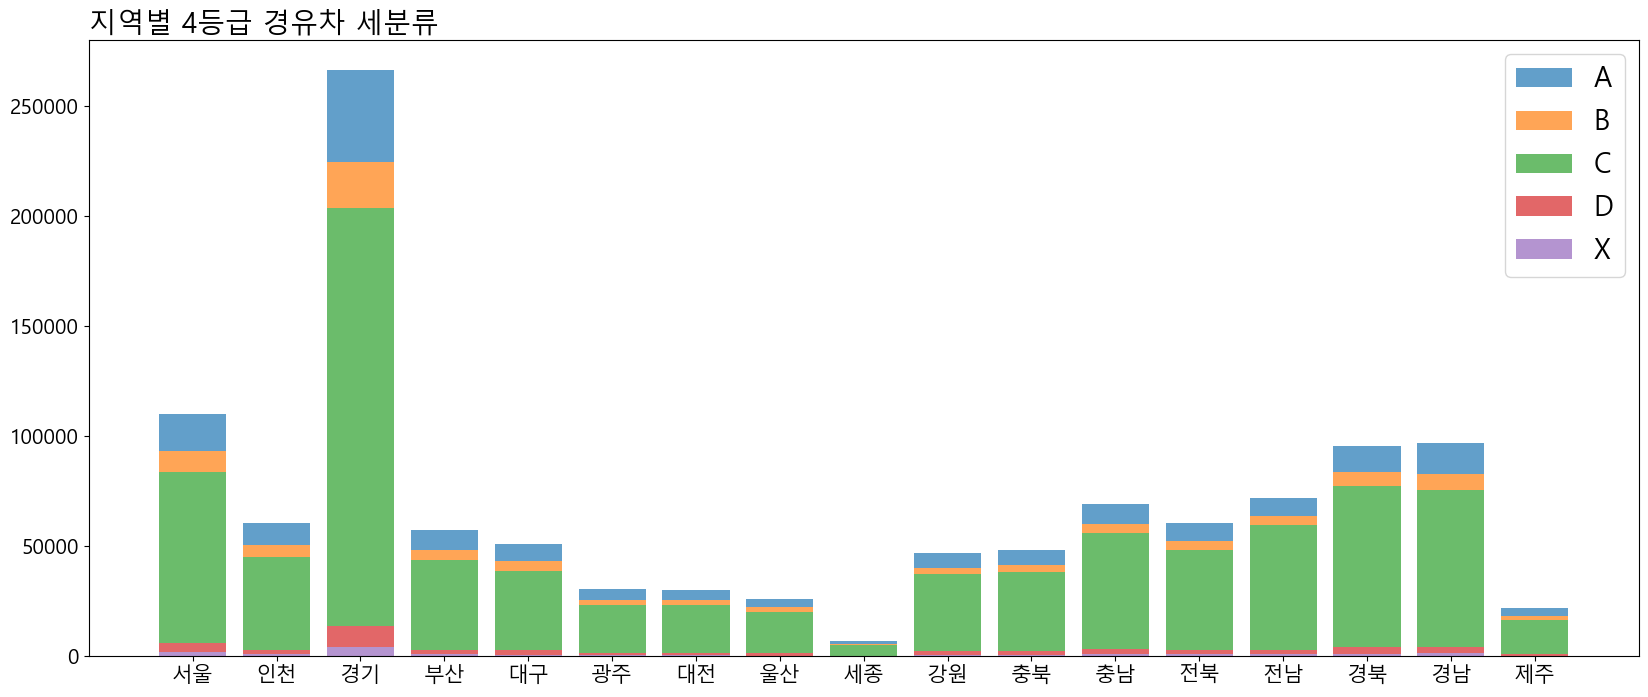

In [74]:
x = vis_df.columns[1:]
# ya = list(vis_df.iloc[0, 1:])
# yb = list(vis_df.iloc[1, 1:])
# yc = list(vis_df.iloc[2, 1:])
# yd = list(vis_df.iloc[3, 1:])
# yx = list(vis_df.iloc[4, 1:])
labels = ['A', 'B', 'C', 'D', 'X']
plt.figure(figsize=(20, 8))
plt.title(f'지역별 4등급 {fuel}차 세분류', loc='left', fontdict={'fontsize':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for i in range(vis_df.shape[0]):
    plt.bar(x, list(vis_df.iloc[i, 1:]), bottom=np.sum(vis_df.iloc[i+1:, 1:]), label=labels[i], alpha=0.7)
plt.legend(fontsize=20);

In [75]:
vis_df.to_excel(os.path.join(analysis_fold, '통계_4등급_경유차_지역_EG.xlsx'), index=False)

#### 4등급 시도별, EG별 차량수

In [10]:
result.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', 'Grade', '시군구명_수정', 'dong_code', 'E_CO_total',
       'E_HC_total', 'E_NOx_total', 'E_PM10_total', 'E_PM2_5_total'],
      dtype='object')

In [16]:
vis_df2 = result.groupby(['시도명', '시군구명', 'Grade'], dropna=False)['차대번호'].count().unstack().reset_index()
vis_df2

Grade,시도명,시군구명,A,B,C,D,X,NaN
0,강원도,강릉시,1060.00,1443.00,4221.00,213.00,127.00,21.00
1,강원도,고성군,155.00,300.00,898.00,34.00,12.00,NaN
2,강원도,동해시,459.00,793.00,1824.00,111.00,53.00,7.00
3,강원도,삼척시,354.00,419.00,1582.00,75.00,46.00,6.00
4,강원도,속초시,298.00,636.00,1407.00,79.00,53.00,5.00
...,...,...,...,...,...,...,...,...
251,충청북도,청주시 상당구,831.00,1407.00,3440.00,160.00,106.00,23.00
252,충청북도,청주시 서원구,869.00,1415.00,3035.00,173.00,130.00,9.00
253,충청북도,청주시 청원구,936.00,1652.00,3655.00,181.00,134.00,13.00
254,충청북도,청주시 흥덕구,1139.00,1881.00,4383.00,198.00,162.00,21.00


In [17]:
vis_df2.to_excel(os.path.join(analysis_fold, '통계_4등급_시도_시구군_EG별_차량현황.xlsx'), index=False)

## [출력] EG 통계

In [80]:
analysis_fold

'D:/data/big2/BD1/an'

In [81]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.04.18_PM.03.21.33'

In [82]:
with pd.ExcelWriter(os.path.join(analysis_fold, f'G4_통계_EG_{today_date}.xlsx')) as writer:
    num_by_fuel.to_excel(writer, sheet_name='연료별', index=False)
    num_by_grade.to_excel(writer, sheet_name='등급별')
    num_by_grade_by_local.to_excel(writer, sheet_name='지역별')

## [출력] 지역별 샘플

In [54]:
df.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', 'fuel', 'Grade'],
      dtype='object')

In [55]:
df[['법정동코드', '시도명', '시군구명', 'Grade', '차량번호', 'DPF유무_수정', '연식']].head(10)

,법정동코드,시도명,시군구명,Grade,차량번호,DPF유무_수정,연식
0,3017011600,대전광역시,서구,D,21로7811,무,2006
1,2635010700,부산광역시,해운대구,D,23거2347,무,2006
2,4148012200,경기도,파주시,D,04어9316,무,2006
3,2623010900,부산광역시,부산진구,D,14우2622,무,2006
4,5013010300,제주특별자치도,서귀포시,D,07머3269,무,2006
5,4150031021,경기도,이천시,D,58거7827,무,2006
6,4817012100,경상남도,진주시,D,64보3244,무,2006
7,4167025035,경기도,여주시,D,69가2031,무,2006
8,4213010300,강원도,원주시,D,06주6090,무,2006
9,4684035021,전라남도,무안군,D,32어5631,무,2006


In [74]:
# df[['법정동코드', '시도명', '시군구명', 'Grade', '차량번호', 'DPF유무_수정', '연식']].head(10).to_excel(os.path.join(analysis_fold, f'샘플_법정동코드_지역_{today_date}.xlsx'), index=False)

In [56]:
df.groupby(['시도명', '시군구명', 'Grade', 'DPF유무_수정'], dropna=False)['차대번호'].count()

시도명   시군구명  Grade  DPF유무_수정
강원도   강릉시   A      유            928
                   NaN          117
            B      유            459
                   NaN          981
            C      무           4221
                               ... 
충청북도  충주시   B      NaN         1425
            C      무           4999
            D      무            218
            X      확인불가         103
                   NaN           49
Name: 차대번호, Length: 2006, dtype: int64

# 배인번호 HB 포함한 샘플 출력

In [108]:
df1.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade'],
      dtype='object')

In [114]:
hb = df1.copy()

In [115]:
hb['배출가스인증번호'] = hb['배출가스인증번호'].astype('str')
hb['배인번호_수정'] = hb['배인번호_수정'].astype('str')

In [116]:
temp = hb.loc[hb['배인번호_수정'].str.contains('HB')].reset_index(drop=True)
temp.shape

(2672, 32)

## [출력] 샘플

In [117]:
# about 1.5s
temp.to_excel(os.path.join(raw_fold, '샘플_배인번호_수정에_HB포함.xlsx'), index=False)

# 코드 마지막